In [1]:
#import numpy as np

#data = np.load(r"/home/rosario/explainable/Bachelor/Results/Num_Epochs_5batchSize_42023-01-14_172750/featureListALL.npz")
#a = data["featureListALL"][0]
#for i in a:
#    if i != 0.0 and i != 1.0: 
#        print(repr(np.float64(i)))
        

In [2]:
import numpy as np

#rulesResults = np.load("WorkingResults/_2023-08-16_19:31:42.npz", allow_pickle=True) # 250NEW
#trainResults = np.load("WorkingResults/data250New.npz", allow_pickle=True) # 250NEW





rulesResults = np.load("./NLP_Results/rulesResults/discriminative_rules/_2023-08-18_10:31:23.npz", allow_pickle=True)
trainResults = np.load("./NLP_Results/Trainingresults/data.npz", allow_pickle=True)



rulesResults = np.load("NLP_Results/rulesResults/discriminative_rules/_2023-08-19_23:05:01.npz", allow_pickle=True)
trainResults = np.load("/home/rosario/Bachelor/NLP_Results/Trainingresults/data.npz", allow_pickle=True)



# = np.load("./WorkingResults/rulesResults/discriminative_rules/_2023-07-21_10:45:16.npz")

for i in rulesResults:
    print(i)
#print("----")
len(rulesResults["labelList_rules_overIterations"])





rules_list_overIterations
labelList_rules_overIterations
rulePrecisionList_overIterations
predictionComparisonList_overIterations
rulesComplexityList_overIterations
globalCoverageList_overIterations
ruleSupportList_overIterations
numberOfGeneratedRules_overIterations
jaccardSimilarity_overIterations
cosineSimilarity_overIterations
overlapSimilarity_overIterations
diceSimilarity_overIterations
raw_rules_overIterations
numberOfGeneratedRulesRAW_overIterations
rulePrecisionListPerRule_overIterations
trackedRules_OHE
precsicionDict
test_accuracies
loss


251

In [3]:
for i in rulesResults:
    print(i)


    #print(rulesResults[str("trackedRules_OHE")])

rules_list_overIterations
labelList_rules_overIterations
rulePrecisionList_overIterations
predictionComparisonList_overIterations
rulesComplexityList_overIterations
globalCoverageList_overIterations
ruleSupportList_overIterations
numberOfGeneratedRules_overIterations
jaccardSimilarity_overIterations
cosineSimilarity_overIterations
overlapSimilarity_overIterations
diceSimilarity_overIterations
raw_rules_overIterations
numberOfGeneratedRulesRAW_overIterations
rulePrecisionListPerRule_overIterations
trackedRules_OHE
precsicionDict
test_accuracies
loss


In [4]:
for i in trainResults:
    print(i)

y_test
inputFeatures
testLossPerEpochList
testLossPerIterationList
testAccPerEpochList
testAccPerIterationList
testPredictionList
testCosine_similarity_toInitialList
testCosine_similarity_toFinalList
testPercentageWeightSignDifferences_toInitialList
testPercentageWeightSignDifferences_toFinalList
testAbsoluteIterationWeightsList
testL2Dist_toInitialList
testL2Dist_toFinalList
testRandom10WeightsList
testGradientsPerSamplePerFeature
testGradientsPerFeature
testGradientMagnitudePerFeature
testAveragedGradientMagnitude
testGradientsPerSamplePerFeature_iteration
testGradientsPerFeature_iteration
testGradientMagnitudePerFeature_iteration
testAveragedGradientMagnitude_iteration
Total_gradientsList_iteration


In [5]:
from matplotlib import pyplot as plt


In [6]:
#changes binnned in n_sized bins 
    # count how often the apprearance of a rule has changed over iterations 
import numpy as np
#trackedRules_OHE  = np.array([[1,0,1,1,1,1,0,0,1],
#                                  [0,0,0,0,0,0,0,0,1],
 #                                 [0,0,0,0,1,1,0,0,0]])


#RULE CHANGE TRACKER !!!!
def getchangeTrackerList(trackedRules_OHE):
    #transpore
    trackedRules_OHE = np.array(trackedRules_OHE).transpose()

    #now we have over the rows the iterarations  
    # and over the colums the rules   
    """
        iterations   -> 
        [[1 1 1 0 0]
      ^ [1 0 0 1 0]
      | [0 1 1 0 1]]
    rules list

    
    """
    #trackedRules_OHE  = np.array([[1,0,1,1,1,1,0,0,1],[0,0,0,0,0,0,0,0,1],[0,0,0,0,1,1,0,0,0]])
    changeTrackerList =[]
    for i in trackedRules_OHE:
        temp = -1
        changeTracker = []
        for j in range(len(i)):
            #if i[j] != 0:
                if i[j] != temp:
                    changeTracker.append(1)
                    temp = i[j]
                else:
                    changeTracker.append(0)
                    temp = i[j]
        changeTrackerList.append(changeTracker)

    return changeTrackerList

changeTrackerList = getchangeTrackerList(rulesResults["trackedRules_OHE"])#(rulesResults["trackedRules_OHE"])

#print(changeTrackerList)
#print(len(changeTrackerList))

#trackedRules_OHE  = [[1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1],]
                                  
#print(rulesResults["trackedRules_OHE"])
def countConsequtiveRuleApperance(trackedRules_OHE,n):
    ruleAtIterationIsImportant_List = []
    for i in trackedRules_OHE:
        #print(i)
        ruleAtIterationIsImportant =[]
        for j in range(0,len(i)):
            #print("j")
            #print(j)

            
            #print(j)
           # print(n)
           # print(j<=n)
            if j < n -1:
                #print("ok?")
                ruleAtIterationIsImportant.append(0) #0 is not important | cause n iterations not reached yet
            elif j > (len(i) -n):
                ruleAtIterationIsImportant.append(0)
            else:
                tempConsequentApperanceCounter = list(i[j:j+n]).count(1)
                #print("a")
                #print(tempConsequentApperanceCounter)
                #print(i[j:j+n].count(1))
                #print("aaaa")
                #print(tempConsequentApperanceCounter)
                if tempConsequentApperanceCounter == n:
                   # print("asasasdaas")
                    ruleAtIterationIsImportant.append(1) # is imortant at iteration
                else:
                    ruleAtIterationIsImportant.append(0)
        #print(ruleAtIterationIsImportant)
        ruleAtIterationIsImportant_List.append(ruleAtIterationIsImportant)

    return ruleAtIterationIsImportant_List

ruleAtIterationIsImportant_List_3= countConsequtiveRuleApperance(rulesResults["trackedRules_OHE"],3)
ruleAtIterationIsImportant_List_5= countConsequtiveRuleApperance(rulesResults["trackedRules_OHE"],5)
ruleAtIterationIsImportant_List_10= countConsequtiveRuleApperance(rulesResults["trackedRules_OHE"],10)
ruleAtIterationIsImportant_List_20= countConsequtiveRuleApperance(rulesResults["trackedRules_OHE"],20)
ruleAtIterationIsImportant_List_50= countConsequtiveRuleApperance(rulesResults["trackedRules_OHE"],50)

print(len(ruleAtIterationIsImportant_List_3))
print(len(ruleAtIterationIsImportant_List_5))

251
251


<function matplotlib.pyplot.show(close=None, block=None)>

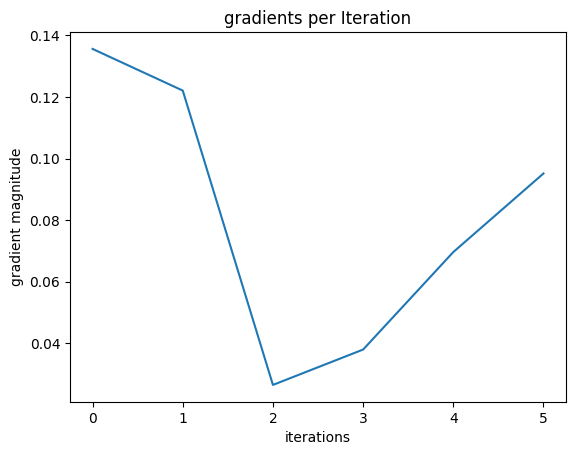

In [7]:
plt.title("gradients per Iteration")
plt.xlabel("iterations")
plt.ylabel("gradient magnitude")
plt.plot(trainResults["Total_gradientsList_iteration"])

plt.show


[[1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 251 and the array at index 1 has size 6

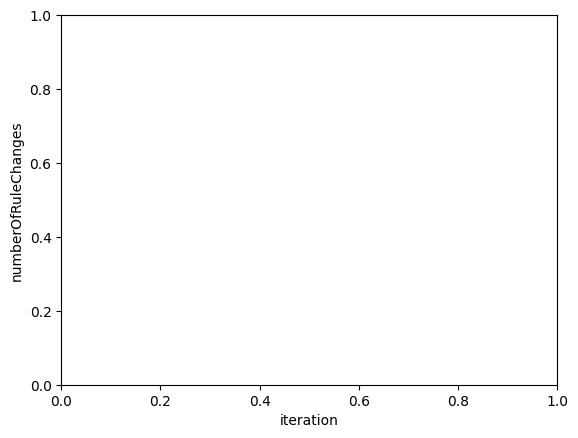

In [8]:
print(changeTrackerList)
print(len(changeTrackerList)) # rules
print(len(changeTrackerList[0])) # iteration
print(np.array(changeTrackerList).transpose())

#%matplotlib qt
numberOfRuleChanges = [] 
for i in np.array(changeTrackerList).transpose():
    numberOfRuleChanges.append(list(i).count(1))
print(numberOfRuleChanges)

#plt.plot(numberOfRuleChanges)
plt.xlabel("iteration")
plt.ylabel("numberOfRuleChanges")

temp =[] 
for i in range(len(rulesResults["numberOfGeneratedRulesRAW_overIterations"])):
#    print((numberOfRuleChanges[i] /rulesResults["numberOfGeneratedRulesRAW_overIterations"][i]) )
#    print((numberOfRuleChanges[i] / 800))
#    print("--")
    temp.append((numberOfRuleChanges[i] /rulesResults["numberOfGeneratedRulesRAW_overIterations"][i]))

print(np.corrcoef(temp, trainResults["Total_gradientsList_iteration"] ))
plt.plot(temp)
plt.xlabel("iteration")
plt.ylabel("numberOfRuleChanges")

[0, 5, 2, 0, 5, 1, 0, 0, 1, 2, 0, 1, 4, 0, 0, 5, 3, 2, 3, 0, 1, 0, 3, 0, 0, 2, 1, 4, 5, 0, 4, 4, 0, 0, 5, 1, 3, 2, 3, 0, 3, 5, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 3, 4, 3, 0, 0, 3, 5, 4, 0, 0, 0, 3, 1, 1, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 5, 0, 2, 0, 0, 4, 2, 2, 3, 0, 2, 0, 0, 4, 5, 1, 1, 4, 3, 0, 5, 0, 3, 0, 1, 3, 0, 0, 2, 0, 1, 0, 1, 2, 3, 1, 2, 0, 3, 5, 1, 1, 3, 4, 1, 0, 5, 0, 5, 5, 0, 3, 0, 2, 1, 1, 1, 1, 4, 0, 0, 5, 1, 0, 2, 0, 0, 2, 2, 3, 0, 1, 1, 2, 1, 4, 4, 0, 1, 4, 4, 3, 5, 5, 2, 2, 5, 4, 2, 0, 0, 3, 5, 4, 1, 3, 3, 0, 0, 1, 0, 1, 0, 1, 0, 4, 3, 4, 4, 0, 2, 2, 0, 4, 5, 0, 0, 3, 0, 2, 1, 5, 2, 0, 2, 1, 5, 1, 1, 3, 1, 0, 1, 2, 1, 1, 3, 4, 3, 1, 1, 3, 0, 0, 2, 5, 0, 0, 2, 0, 2, 4, 4, 1, 0, 2, 0, 1, 4, 1, 0, 1, 0, 0, 1, 1, 4, 0, 1, 3, 1, 5, 5, 0, 0, 4, 0, 3, 2, 4, 5, 3, 4, 0, 3, 3, 2, 5, 4, 5, 4, 1, 0, 0, 2, 4, 5, 1, 2, 0, 2, 0, 3, 2, 0, 2, 4, 2, 4, 5, 1, 0, 2, 1, 5, 3, 4, 2, 1, 0, 3, 1, 3, 0, 5, 0, 0, 4, 4, 4, 3, 3, 1, 2, 3, 0, 0, 4, 2, 5, 0, 0, 

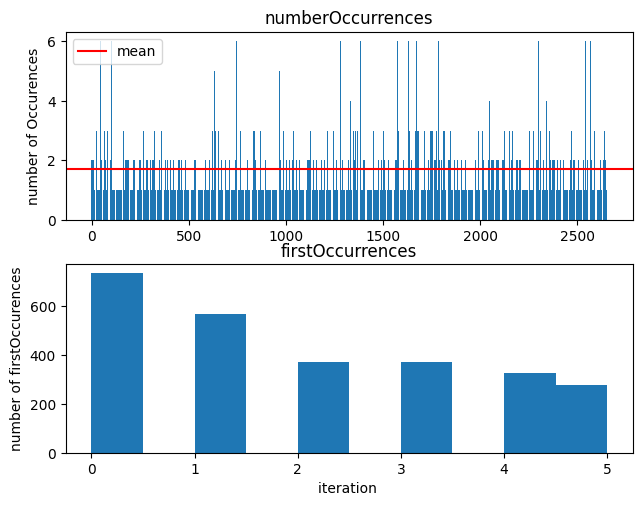

In [ ]:
#trackedRules_OHE  = np.array([[1,0,1,1,1,1,0,0,1],
#                              [0,0,0,0,0,0,0,0,1],
#                              [0,0,0,0,1,1,0,0,0]])
#%matplotlib qt 
def getOccurrences(trackedRules_OHE):
    """
    returns fistOccurences , occurencesCounter
    """
    firstOccurrences_List = []
    occurencesCounter_List =[]

    #for i in trackedRules_OHE:
    
    trackedRules_OHE= np.array(trackedRules_OHE).transpose()
    for i in trackedRules_OHE:
        occurencesCounter_List.append(list(i).count(1))
        for index, j in enumerate(i):
            

            if j == 1:
                firstOccurrences_List.append(index)
                break
    print(firstOccurrences_List)
    print(len(firstOccurrences_List))
    print(occurencesCounter_List)
    print(len(occurencesCounter_List))

    return firstOccurrences_List , occurencesCounter_List

firstOccurrences_List , occurencesCounter_List = getOccurrences(rulesResults["trackedRules_OHE"])
#TEMPNAME(trackedRules_OHE)
from matplotlib import pyplot as plt


figAcc, axsAcc = plt.subplots(nrows=2, ncols=1)

figAcc.tight_layout()
axsAcc[1].hist(firstOccurrences_List)
axsAcc[1].set_title("firstOccurrences")
axsAcc[1].set_ylabel("number of firstOccurences")
axsAcc[1].set_xlabel("iteration ")

axsAcc[0].bar(range(len(occurencesCounter_List)), occurencesCounter_List)
axsAcc[0].set_title("numberOccurrences")
axsAcc[0].set_ylabel("number of Occurences")

print(np.mean(occurencesCounter_List))
axsAcc[0].axhline(np.mean(occurencesCounter_List), color='r', label="mean")
axsAcc[0].legend()
#axsAcc.axhline(np.std(occurencesCounter_List), color='g')

#print(len(rulesResults["trackedRules_OHE"]))
#print(len(rulesResults["trackedRules_OHE"][0]))
plt.show()


[0. 0. 0. 0. 0. 0.]
[62, 76, 27, 86, 72, 80]
[0. 0. 0. 0. 0. 0.]
[[nan nan]
 [nan  1.]]
[62, 76, 27, 86, 72, 80]


/home/rosario/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/rosario/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


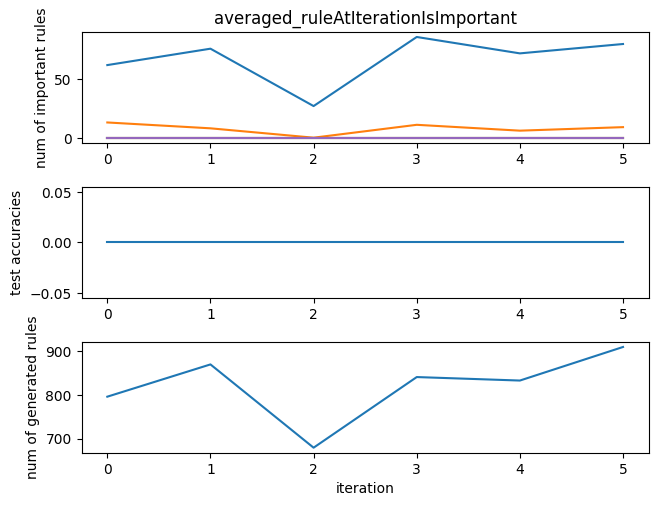

In [ ]:
averaged_ruleAtIterationIsImportant_List_3 = []
averaged_ruleAtIterationIsImportant_List_5 = []
averaged_ruleAtIterationIsImportant_List_10 = []
averaged_ruleAtIterationIsImportant_List_20 = []
averaged_ruleAtIterationIsImportant_List_50 = []

for i in range(len(ruleAtIterationIsImportant_List_3)):
    #print(i)
    averaged_ruleAtIterationIsImportant_List_3.append(ruleAtIterationIsImportant_List_3[i].count(1))
    averaged_ruleAtIterationIsImportant_List_5.append(ruleAtIterationIsImportant_List_5[i].count(1))
    averaged_ruleAtIterationIsImportant_List_10.append(ruleAtIterationIsImportant_List_10[i].count(1))
    averaged_ruleAtIterationIsImportant_List_20.append(ruleAtIterationIsImportant_List_20[i].count(1))
    averaged_ruleAtIterationIsImportant_List_50.append(ruleAtIterationIsImportant_List_50[i].count(1))




#print(max(averaged_ruleAtIterationIsImportant_List))
#print(min(averaged_ruleAtIterationIsImportant_List))

import matplotlib.pyplot as plt

figAcc, axsAcc = plt.subplots(nrows=3, ncols=1)
figAcc.tight_layout()
    #data = utils.loadData(dataPath+ "data.npz")

axsAcc[0].set_title("averaged_ruleAtIterationIsImportant")
axsAcc[2].set_xlabel("iteration")
axsAcc[0].set_ylabel("num of important rules")
axsAcc[1].set_ylabel("test accuracies")
axsAcc[2].set_ylabel("num of generated rules")

axsAcc[0].plot(averaged_ruleAtIterationIsImportant_List_3, label='consequent apperance: 3')
axsAcc[0].plot(averaged_ruleAtIterationIsImportant_List_5, label='consequent apperance: 5')
axsAcc[0].plot(averaged_ruleAtIterationIsImportant_List_10, label='consequent apperance: 10')
axsAcc[0].plot(averaged_ruleAtIterationIsImportant_List_20, label='consequent apperance: 20')
axsAcc[0].plot(averaged_ruleAtIterationIsImportant_List_50, label='consequent apperance: 50')

axsAcc[1].plot(trainResults["testAccPerIterationList"])

#def pointwise_correlation(X, Y):
#    List = []
#    for i in range(X)#:#
#        X_mean = np.mean(X)
#        Y_mean = np.mean(Y)
    
#        numerator = np.sum((X - X_mean) * (Y - Y_mean))
#        denominator = np.sqrt(np.sum((X - X_mean)**2)) * np.sqrt(np.sum((Y - Y_mean)**2))

#        correlation = numerator / denominator
#        List.append(correlation)
#       print(correlation)
#    return correlation

#correlationList = pointwise_correlation(trainResults["testAccPerIterationList"],averaged_ruleAtIterationIsImportant_List_3)

print(trainResults["testAccPerIterationList"])
correlation = np.corrcoef(trainResults["testAccPerIterationList"],averaged_ruleAtIterationIsImportant_List_3)
print(averaged_ruleAtIterationIsImportant_List_3)
print(trainResults["testAccPerIterationList"])
#axsAcc[2].plot(correlation)
print(correlation)
axsAcc[2].plot(rulesResults["numberOfGeneratedRules_overIterations"])
print(averaged_ruleAtIterationIsImportant_List_3)

#testList =[]
#for i in range(245):
#    testList.append(ruleAtIterationIsImportant_List_3[i] / rulesResults["numberOfGeneratedRules_overIterations"][i])

#print(testList)
#print(np.shape(testList))
#axsAcc[4].plot(testList)

734
796
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

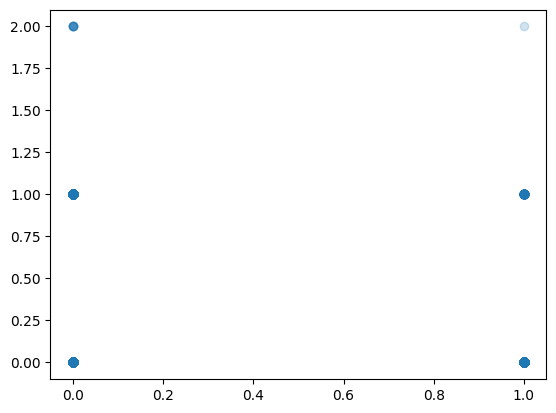

In [ ]:
print(list(rulesResults["trackedRules_OHE"][0]).count(1))
print(len(rulesResults["rulePrecisionListPerRule_overIterations"][0]))
print((ruleAtIterationIsImportant_List_10[0]))

print(len(rulesResults["precsicionDict"]))
#temp = []
#for ik in rulesResults["trackedRules_OHE"]:
#    counter = 0 
#    for i in ik: #rulesResults["trackedRules_OHE"][0]:
#        if i == 1:
#            temp.append(rulesResults["rulePrecisionListPerRule_overIterations"][0][counter])#
#            counter +=1
#        else:
#            temp.append(0)

#print(len(temp))
def count_consecutive_ones(lst):
    max_consecutive = 0
    current_consecutive = 0

    for num in lst:
        if num == 1:
            current_consecutive += 1
            max_consecutive = max(max_consecutive, current_consecutive)
        else:
            current_consecutive = 0

    return max_consecutive
consequtiveMaxApperance = []
for i in np.array(ruleAtIterationIsImportant_List_3).transpose():
    consequtiveMaxApperance.append(count_consecutive_ones(i))
print(consequtiveMaxApperance.count(1))



import utils
bin_edges = np.linspace(0, 1, 11)  # Creates 10 evenly spaced bins from 0.0 to 1.0
print(bin_edges)
# Use numpy's histogram function to count data points in each bin
#hist, _ = np.histogram(rulesResults["precsicionDict"], bins=bin_edges)
#print(hist)
#plt.hist(hist)

#plt.bar(rulesResults["precsicionDict"],consequtiveMaxApperance)

print(min(rulesResults["precsicionDict"]))

from collections import Counter


element_counts = Counter(rulesResults["precsicionDict"])

# Print the counts
for element, count in element_counts.items():
    print(f"Element {element} occurs {count} times")

print(consequtiveMaxApperance)


plt.scatter(rulesResults["precsicionDict"],consequtiveMaxApperance, alpha=0.2)


/home/rosario/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/rosario/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


[[ 1. nan]
 [nan nan]]
[[ 1.         -0.64429596]
 [-0.64429596  1.        ]]
---
[[ 1. nan]
 [nan nan]]
[[ 1.         -0.77528816]
 [-0.77528816  1.        ]]
---
[[ 1. nan]
 [nan nan]]
[[ 1.         -0.69846883]
 [-0.69846883  1.        ]]
---
[[ 1. nan]
 [nan nan]]
[[ 1.         -0.77528816]
 [-0.77528816  1.        ]]
---
[[ 1. nan]
 [nan nan]]
[[ 1.         -0.68977831]
 [-0.68977831  1.        ]]
to good to be true ?
[[ 1. nan]
 [nan nan]]
[[ 1.         -0.86432063]
 [-0.86432063  1.        ]]
[[ 1. nan]
 [nan nan]]
[[ 1.         -0.30899522]
 [-0.30899522  1.        ]]


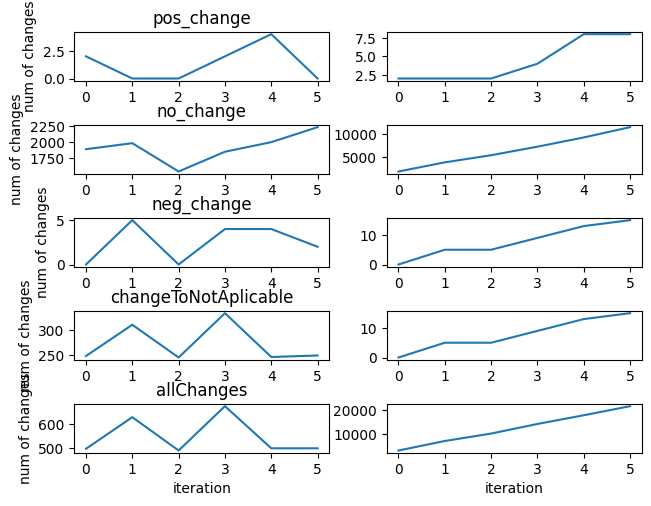

In [ ]:
predictionComparisonList_overIterations = rulesResults["predictionComparisonList_overIterations"] 
num_posChange_overIteration = []
num_negChange_overIteration = []
num_noChange_overIteration = []
num_notAplicableChange_overIteration = []
num_allChanges_overIteration = []

num_posChange_overIteration_sinceBeginning = []
num_posChange_sinceBeginning =0

num_negChange_overIteration_sinceBeginning = []
num_negChange_sinceBeginning =0

num_noChange_overIteration_sinceBeginning = []
num_noChange_sinceBeginning =0

num_notAplicableChange_overIteration_sinceBeginning = []
num_notAplicableChange_sinceBeginning =0

num_allChanges_overIteration_sinceBeginning = []
num_allChanges_sinceBeginning = 0


#num_posChange = 0
#num_negChange = 0
#num_noChange = 0
#num_notAplicableChange = 0
for i in predictionComparisonList_overIterations:
    temp_item = None
    num_posChange = 0
    num_negChange = 0
    num_noChange = 0
    num_notAplicableChange = 0
    num_allChanges = 0
    for j in i:
        for item in j: 
            if temp_item == None:

                #print(temp_item)
                pass
            elif temp_item == item:
                num_noChange += 1
                num_noChange_sinceBeginning +=1
            elif temp_item == 1:
                if item == 0:
                    num_negChange +=1
                    num_negChange_sinceBeginning +=1

                elif item == -1:
                    num_notAplicableChange +=1
                    num_notAplicableChange_sinceBeginning +=1
            elif temp_item == 0:
                if item ==1:
                    num_posChange +=1
                    num_posChange_sinceBeginning +=1
                elif item == -1:
                    num_notAplicableChange +=1
                    num_notAplicableChange_sinceBeginning +=1
        
            temp_item = item
        #print()
        num_allChanges = len(i) * len(j) - num_noChange
        
        num_allChanges_sinceBeginning += num_allChanges
    num_allChanges_overIteration.append(num_allChanges)
    num_posChange_overIteration.append(num_posChange)
    num_negChange_overIteration.append(num_negChange)
    num_noChange_overIteration .append(num_noChange)
    num_notAplicableChange_overIteration.append(num_notAplicableChange)
    
    num_posChange_overIteration_sinceBeginning.append(num_posChange_sinceBeginning)
    num_negChange_overIteration_sinceBeginning.append(num_negChange_sinceBeginning)
    num_noChange_overIteration_sinceBeginning.append(num_noChange_sinceBeginning)
    num_notAplicableChange_overIteration_sinceBeginning.append(num_negChange_sinceBeginning)
    num_allChanges_overIteration_sinceBeginning.append(num_allChanges_sinceBeginning)


        #else:
        #    if sample == 

figAcc, axsAcc = plt.subplots(nrows=5, ncols=2)
figAcc.tight_layout()
    #data = utils.loadData(dataPath+ "data.npz")


axsAcc[0][0].set_title("pos_change")
axsAcc[1][0].set_title("no_change")
axsAcc[2][0].set_title("neg_change")
axsAcc[3][0].set_title("changeToNotAplicable")
axsAcc[4][0].set_title("allChanges")


axsAcc[4][0].set_xlabel("iteration")
axsAcc[4][1].set_xlabel("iteration")

axsAcc[0][0].set_ylabel("num of changes")
axsAcc[1][0].set_ylabel("num of changes")
axsAcc[2][0].set_ylabel("num of changes")
axsAcc[3][0].set_ylabel("num of changes")
axsAcc[4][0].set_ylabel("num of changes")

#axsAcc.set_yticks([0,20,40,60,80,100,110,120,130,140,])
axsAcc[1][0].plot(num_noChange_overIteration, label='num_noChange_overIteration')
axsAcc[0][0].plot(num_posChange_overIteration , label='num_posChange_overIteration')
axsAcc[2][0].plot(num_negChange_overIteration, label='num_negChange_overIteration')
axsAcc[3][0].plot(num_notAplicableChange_overIteration, label='num_notAplicableChange_overIteration')
axsAcc[4][0].plot(num_allChanges_overIteration, label='num_allChanges_overIteration')#



axsAcc[1][1].plot(num_noChange_overIteration_sinceBeginning, label='num_noChange_overIteration_sinceBeginning')
axsAcc[0][1].ticklabel_format(style='plain', axis='y')
axsAcc[0][1].plot(num_posChange_overIteration_sinceBeginning , label='num_posChange_overIteration_sinceBeginning')
axsAcc[2][1].plot(num_negChange_overIteration_sinceBeginning, label='num_negChange_overIteration_sinceBeginning')
axsAcc[3][1].plot(num_notAplicableChange_overIteration_sinceBeginning, label='num_notAplicableChange_overIteration_sinceBeginning')#
axsAcc[4][1].plot(num_allChanges_overIteration_sinceBeginning, label='num_allChanges_overIteration_sinceBegninning')#
axsAcc[4][1].ticklabel_format(style='plain', axis='y')

#axsAcc[1][0].legend()

#axsAcc[1][1].plot(num_posChange_overIteration_sinceBeginning, label='num_posChange_overIteration_sinceBeginning')

# axsAcc[1][1].legend()

#axsAcc[2][1].plot(trainResults["testAccPerIterationList"], label='testAccPerIterationList')

#axsAcc[2][0].plot((np.array(num_allChanges_overIteration) / (len(predictionComparisonList_overIterations) * len(predictionComparisonList_overIterations[0]))) , label= "a")
#axsAcc[2][0].legend()

#print(np.corrcoef(num_posChange_overIteration_sinceBeginning, trainResults["testAccPerIterationList"]))
print(np.corrcoef(num_posChange_overIteration_sinceBeginning, rulesResults["test_accuracies"]))
print(np.corrcoef(num_posChange_overIteration_sinceBeginning, rulesResults["loss"]))
#print(np.corrcoef(num_posChange_overIteration_sinceBeginning, trainResults["testLossPerIterationList"]))
print("---")
print(np.corrcoef(num_negChange_overIteration_sinceBeginning, trainResults["testAccPerIterationList"]))
print(np.corrcoef(num_negChange_overIteration_sinceBeginning, rulesResults["loss"]))
print("---")
print(np.corrcoef(num_noChange_overIteration_sinceBeginning, trainResults["testAccPerIterationList"]))
print(np.corrcoef(num_noChange_overIteration_sinceBeginning, rulesResults["loss"]))
print("---")
print(np.corrcoef(num_notAplicableChange_overIteration_sinceBeginning, trainResults["testAccPerIterationList"]))
print(np.corrcoef(num_notAplicableChange_overIteration_sinceBeginning, rulesResults["loss"]))
print("---")
print(np.corrcoef(num_allChanges_overIteration_sinceBeginning, trainResults["testAccPerIterationList"]))
print(np.corrcoef(num_allChanges_overIteration_sinceBeginning, rulesResults["loss"]))

print("to good to be true ?")


print(np.corrcoef(np.linspace(0, 1, len(trainResults["testAccPerIterationList"])), trainResults["testAccPerIterationList"]))
print(np.corrcoef(np.linspace(0, 1, len(trainResults["testAccPerIterationList"])), trainResults["testLossPerIterationList"]))

print(np.corrcoef(np.random.rand(len(trainResults["testAccPerIterationList"])), trainResults["testAccPerIterationList"]))
print(np.corrcoef(np.random.rand(len(trainResults["testAccPerIterationList"])), trainResults["testLossPerIterationList"]))

#try sebsastians LOSS and ACC







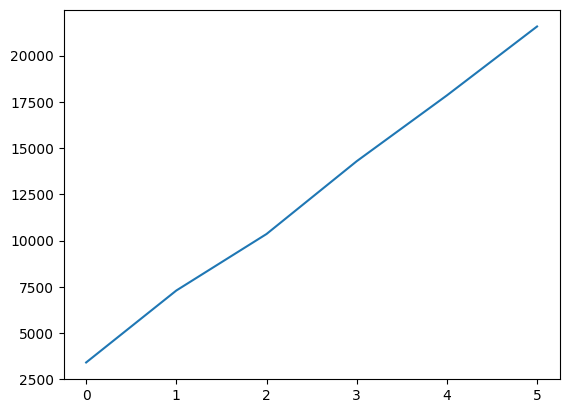

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(num_allChanges_overIteration_sinceBeginning , label='num_posChange_overIteration')

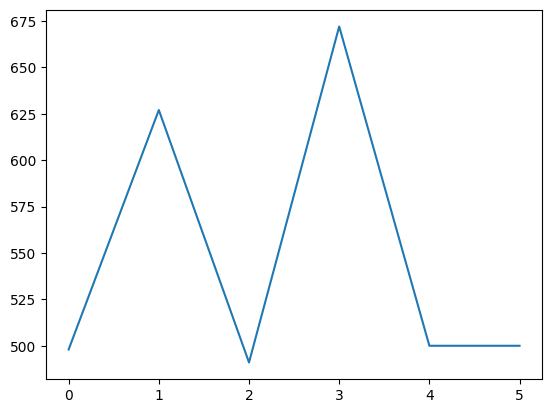

In [ ]:
#%matplotlib qt

fig1, ax1 = plt.subplots(nrows=1, ncols=1)
#ax1.plot(num_posChange_overIteration_sinceBeginning , label='num_posChange_overIteration')
ax1.plot(num_allChanges_overIteration , label='num_posChange_overIteration')

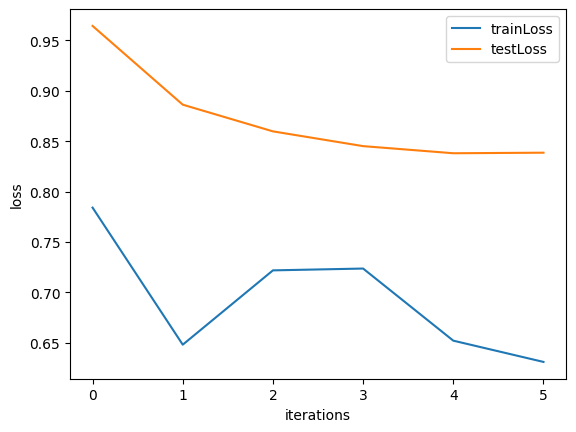

In [ ]:

plt.plot(rulesResults["loss"], label="trainLoss")
plt.plot(trainResults["testLossPerIterationList"], label="testLoss")
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()

In [ ]:
for i in trainResults:
    print(i)

y_test
inputFeatures
testLossPerEpochList
testLossPerIterationList
testAccPerEpochList
testAccPerIterationList
testPredictionList
testCosine_similarity_toInitialList
testCosine_similarity_toFinalList
testPercentageWeightSignDifferences_toInitialList
testPercentageWeightSignDifferences_toFinalList
testAbsoluteIterationWeightsList
testL2Dist_toInitialList
testL2Dist_toFinalList
testRandom10WeightsList
testGradientsPerSamplePerFeature
testGradientsPerFeature
testGradientMagnitudePerFeature
testAveragedGradientMagnitude
testGradientsPerSamplePerFeature_iteration
testGradientsPerFeature_iteration
testGradientMagnitudePerFeature_iteration
testAveragedGradientMagnitude_iteration
Total_gradientsList_iteration


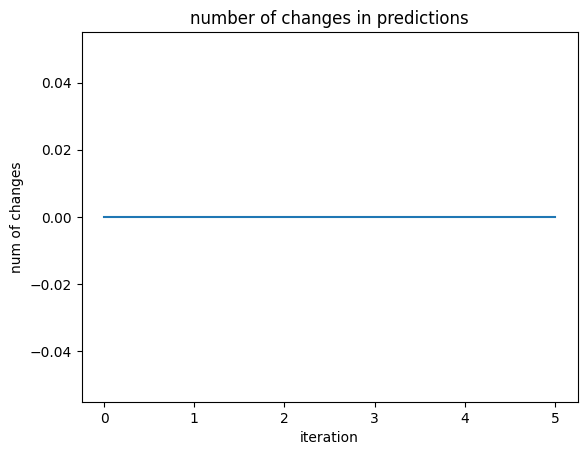

In [ ]:
figAcc, axsAcc = plt.subplots(nrows=1, ncols=1)

    #data = utils.loadData(dataPath+ "data.npz")

axsAcc.set_title("number of changes in predictions")
axsAcc.set_xlabel("iteration")
axsAcc.set_ylabel("num of changes")

#a = np.load("./WorkingResults/total_gradientsListAveraged", allow_pickle=True)

#axsAcc.set_yticks([0,20,40,60,80,100,110,120,130,140,])
axsAcc.plot(trainResults["testAccPerIterationList"], label='testAccPerIterationList')
#a


In [ ]:
for i in trainResults:
    print(i)

y_test
inputFeatures
testLossPerEpochList
testLossPerIterationList
testAccPerEpochList
testAccPerIterationList
testPredictionList
testCosine_similarity_toInitialList
testCosine_similarity_toFinalList
testPercentageWeightSignDifferences_toInitialList
testPercentageWeightSignDifferences_toFinalList
testAbsoluteIterationWeightsList
testL2Dist_toInitialList
testL2Dist_toFinalList
testRandom10WeightsList
testGradientsPerSamplePerFeature
testGradientsPerFeature
testGradientMagnitudePerFeature
testAveragedGradientMagnitude
testGradientsPerSamplePerFeature_iteration
testGradientsPerFeature_iteration
testGradientMagnitudePerFeature_iteration
testAveragedGradientMagnitude_iteration
Total_gradientsList_iteration


In [ ]:
featureListALL= data["featureListALL"]
featureListALL0= data["featureListALL_0"]

training_acc = data["training_acc"]

#600 trainingdatapoints 
print(len(featureListALL[0]))
sizeDS = 455
for i in range(300):
    #print(featureListALL[0][0:4])
    print(featureListALL[0][i*sizeDS:i*sizeDS +6])
    print(featureListALL0[0][i*sizeDS:i*sizeDS +6])

# optimizer.step() after optimizer.zero_grad()

NameError: name 'data' is not defined

In [ ]:
data =np.load("/home/rosario/explainable/Bachelor/test/Results/seedNum_0_BinaryClassification_KaggleDiabetesALL_Num_Epochs_500batchSize_4_0.001_2023-02-02_131052/data.npz")

for i in data:
    print(i)

featureListALL= data["featureListALL"]
featureListALL0= data["featureListALL_0"]

training_acc = data["training_acc"]

#600 trainingdatapoints 
print(len(featureListALL[0]))
sizeDS = 455
for i in range(300):
    #print(featureListALL[0][0:4])
    print(featureListALL[0][i*sizeDS:i*sizeDS +6])
    print(featureListALL0[0][i*sizeDS:i*sizeDS +6])



featureListALL
featureListALL_0
training_acc
test_acc
training_loss_epoch
training_loss_batch
test_loss_epoch
test_loss_batch
227500
[-0.00698076 -0.0085027  -0.00801412 -0.00801412 -0.00800764 -0.00800764]
[-0.00698141 -0.00850374 -0.00801519 -0.00801519 -0.00801412 -0.00801412]
[-0.00670403 -0.00670905 -0.00619547 -0.00759588 -0.00758976 -0.00758976]
[-0.00670447 -0.00670954 -0.00619596 -0.00759663 -0.00759588 -0.00759588]
[-0.0065961  -0.00643485 -0.00539484 -0.0072094  -0.00720358 -0.00720358]
[-0.00659637 -0.00643515 -0.00539516 -0.00720986 -0.0072094  -0.0072094 ]
[-0.00635397 -0.00617552 -0.00511766 -0.00562402 -0.00684532 -0.00684532]
[-0.00635408 -0.00617565 -0.00511777 -0.0056241  -0.00685089 -0.00685089]
[-0.0019936  -0.00455154 -0.00118515 -0.00276023  0.00183943 -0.00276419]
[-0.00199368 -0.00455161 -0.00118526 -0.00276038  0.00184444 -0.00276023]
[-0.00219194 -0.00226218 -0.00140919 -0.00298498  0.00022611 -0.00298882]
[-0.00219222 -0.00226247 -0.00140952 -0.0029853   0.0